In [4]:
# pip install openpyxl
# pip install nltk
# pip install scikit-learn
# pip install pandas

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('words')

# !pip install --upgrade scikit-learn
# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade nltk


In [5]:
#هذا الكود يقوم بتنفيذ خطوات مهمة في معالجة النصوص باستخدام مكتبة 
#Natural Language Toolkit (nltk) في Python. 


#Importing Libraries, Downloading Resources :
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


#Text Preprocessing Function:
def preprocess_text(text):
    # Convert the text to lowercase
    text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.isalnum() and word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word, pos='v') for word in words]

    # Join the processed words back into a sentence
    processed_text = ' '.join(words)

    return processed_text

# Example 
input_text = "Text preprocessing is an important step in running went ate natural language processing."
processed_text = preprocess_text(input_text)
print("Original Text: ", input_text)
print("Processed Text: ", processed_text)


Original Text:  Text preprocessing is an important step in running went ate natural language processing.
Processed Text:  text preprocessing important step run go eat natural language process


In [6]:
# يتم قراءة الملف الذي يحتوي على عناوين الوظائف والسير الذاتية ، ثم
#يتم معالجة النصوص للسير الذاتية وتخزينها في ملف اكسل جديد



import openpyxl
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Open the CSV file with job titles and resumes
file_path_jobs = r"C:\Users\HP\Desktop\data\result_dataset.csv"
df = pd.read_csv(file_path_jobs)

# The column names are 'Category' and 'Resume'
job_titles = df['Category'].tolist()
resumes = df['Resume'].tolist()

valid_words = set(nltk.corpus.words.words())

processed_texts = []

for resume in resumes:
    resume = str(resume).lower()
    resume = resume.translate(str.maketrans('', '', string.punctuation))
    words = nltk.word_tokenize(resume)
    stop_words = set(stopwords.words('english'))
    
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() in valid_words]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in filtered_words]
    processed_text = ' '.join(lemmatized_words)

    processed_texts.append(processed_text)

    
processed_texts_with_newline = '\n\n'.join(processed_texts)

for idx, processed_text in enumerate(processed_texts):
    print(f"Processed Text {idx + 1}:\n{processed_text}\n")

    
token2id = {token: idx for idx, token in enumerate(vectorizer.get_feature_names_out())}

print("Processed Texts:")
print(processed_texts_with_newline)
print("\nToken to ID mapping:", token2id)


total_words_count = len(nltk.word_tokenize(processed_texts_with_newline))
print(f"\nTotal number of words in the file: {total_words_count}")



# Create a DataFrame from the processed data
result_df = pd.DataFrame(processed_data, columns=['Category', 'Resume'])


# Specify the path for the new Excel file
output_file_path = r"C:\Users\HP\Desktop\data\Training_Data.xlsx"

result_df.to_excel(output_file_path, index=False)

print(f"Results saved to {output_file_path}")

Processed Text 1:
python machine learn regression random forest decision cluster analysis word sentiment analysis natural language dimensionality reduction topic neural tableau regular expression angular python flask git docker computer vision open understand deep data science assurance associate data science assurance associate young skill python company young description fraud dispute assurance technology review tar technology review review process run analytics generate core member team review platform tool scratch e discovery domain tool predictive topic result reduce labor time spend review understand end end flow solution research development classification predictive analysis mine information present text data work precision entire tool tar predictive topic evidence follow ey classifier order identify red python cosine similarity topic text blob sentiment analysis tableau dashboard multiple data science analytic text analytics motor vehicle customer review data receive customer 

NameError: name 'vectorizer' is not defined

In [7]:
#################################################################

In [8]:
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import os

import warnings
warnings.filterwarnings('ignore')


from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category10 



sns.set_style('darkgrid')
%matplotlib inline


In [9]:
#قراءة ملف اكسل الجديد (بعد التعديل)، وعرض اول خمس صفوف

resume_data =  pd.read_excel(r"C:\Users\HP\Desktop\data\Training_Data.xlsx")
resume_data.head()

,Category,Resume
0,Data Science,python machine learn regression random forest ...
1,Data Science,education may may data scientist data scientis...
2,Data Science,interest deep learn control system design elec...
3,Data Science,r python sap tableau sap sap pal sap c linear ...
4,Data Science,education data science internship skill data s...


In [10]:
# يحتوي على 143 صف وعمودين
resume_data.shape

(143, 2)

In [11]:
# كل وظيفة كم سيرة ذاتية مرتبطة معها 

resume_data.Category.value_counts()

Category
Web Designing                45
Data Science                 40
Database                     33
Network Security Engineer    25
Name: count, dtype: int64

In [12]:
data = resume_data['Category'].value_counts()
categories = data.index.tolist()
counts = data.values.tolist()

source = ColumnDataSource(data=dict(categories=categories, counts=counts, color=Category10[4]))

output_notebook()
p = figure(x_range=categories, plot_height=350, title="Distribution of Resumes by Category",
           toolbar_location=None, tools="")

p.vbar(x='categories', top='counts', width=0.9, color='color', legend_field="categories", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "vertical"
p.legend.location = "top_right"

show(p)


Loading BokehJS ...

In [13]:
#تشفير الفئات الى ارقام صحيحة لاستخدامها في النماذج التي تقوم بالتعلم الآلي 

Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])
resume_data

,Category,Resume,LebelEncoding
0,Data Science,python machine learn regression random forest ...,0
1,Data Science,education may may data scientist data scientis...,0
2,Data Science,interest deep learn control system design elec...,0
3,Data Science,r python sap tableau sap sap pal sap c linear ...,0
4,Data Science,education data science internship skill data s...,0
...,...,...,...
138,Database,technical oracle data pump data guard golden g...,1
139,Database,server operate server office performance monit...,1
140,Database,oracle grid infrastructure oam shell web apach...,1
141,Database,education may may bachelor science information...,1


In [14]:
# كل وظيفة كم سيرة ذاتية مرتبطة معها بعد ان قمنا بتمثيل الوظائف بالارقام

resume_data.LebelEncoding.value_counts()

LebelEncoding
3    45
0    40
1    33
2    25
Name: count, dtype: int64

In [15]:
#رؤية مثالين عشوائيين من البيانات المتوفرة لدينا 

resume_data.sample(2)

,Category,Resume,LebelEncoding
42,Web Designing,technical web angular bootstrap visual studio ...,3
116,Database,technical oracle data pump data guard golden g...,1


In [16]:
# تقديم احصائيات وصفية : العدد الإجمالي، المتوسط، الانحراف المعياري، الحد الأدنى، والحد الأقصى

resume_data.describe()

,LebelEncoding
count,143.000000
mean,1.524476
std,1.203470
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,3.000000


In [17]:
#عرض عدد القيم الفارغة لكل عمود

resume_data.isnull().sum()

Category         0
Resume           0
LebelEncoding    0
dtype: int64

In [18]:
# تحضير البيانات لتدريب نموذج تعلم آلي

text = resume_data["Resume"].values
labels = resume_data["LebelEncoding"].values

#تقسيم البيانات إلى مجموعة تدريب واختبار:
text_train,text_test,y_train,y_test = train_test_split(text, labels, random_state=0, test_size=0.25, stratify=resume_data.Category)

# random_state=0: يتم تحديد هذا لضمان تكرار النتائج.
# test_size=0.25: يشير إلى أن 25٪ من البيانات ستكون في مجموعة الاختبار.
# stratify=resume_data.Category: يستخدم للحفاظ على توزيع الفئات في مجموعات التدريب والاختبار.



#تحقق من أحجام المجموعات،اول سطرين مجموعة التدريب وتاني سطرين مجموعة الاختبار
print(text_train.shape)
print(y_train.shape)
print(text_test.shape)
print(y_test.shape)



(107,)
(107,)
(36,)
(36,)


In [19]:
# TF_IDF
# يحسب كنسبة عدد مرات ظهور الكلمة إلى عدد كل الكلمات في المستند

word_vectorizer = TfidfVectorizer(
sublinear_tf=True, # تقليل التأثير الكبير للتردد العالي للكلمات
use_idf = True, # تقديم أهمية أكبر للكلمات التي تظهر نادرًا في المستندات
stop_words='english', #  إزالة الكلمات التي لا تحمل الكثير من المعنى
max_features=1000) # الحد الأقصى لعدد الميزات (الكلمات) المستخدمة في المصفوفة.
print(word_vectorizer)

TfidfVectorizer(max_features=1000, stop_words='english', sublinear_tf=True)


In [20]:
X_train = word_vectorizer.fit_transform(text_train)
X_train.shape
print(X_train)

# يتم عرض الصفوف في النتيجة على شكل (i, j)
#  i يمثل رقم الصف 
#  j يمثل رقم العمود.

# يتم تمثيل النصوص كصفوف والكلمات كأعمدة

# مثال للتوضيح 

# قيمة TF-IDF
# 0.11894303614892976 الكلمة في الموضع (0,668)في المصفوفة وزنها هو 



  (0, 668)	0.11894303614892976
  (0, 860)	0.12965466925824065
  (0, 262)	0.1045540367324564
  (0, 710)	0.10758824748309168
  (0, 310)	0.10178401934258748
  (0, 139)	0.13675847038129538
  (0, 517)	0.06862921311116554
  (0, 215)	0.09468021821953275
  (0, 273)	0.08887599007902855
  (0, 680)	0.13675847038129538
  (0, 410)	0.09923585035757859
  (0, 143)	0.13675847038129538
  (0, 396)	0.13675847038129538
  (0, 954)	0.13151858768830194
  (0, 138)	0.13675847038129538
  (0, 142)	0.061902163335072875
  (0, 959)	0.13675847038129538
  (0, 496)	0.1045540367324564
  (0, 759)	0.12385044111773645
  (0, 41)	0.08552182570794269
  (0, 698)	0.09923585035757859
  (0, 23)	0.11094241185417753
  (0, 159)	0.09069563488631453
  (0, 225)	0.053901539040320655
  (0, 155)	0.053901539040320655
  :	:
  (106, 95)	0.07886183022555719
  (106, 881)	0.04143774644062495
  (106, 996)	0.14089064870684415
  (106, 883)	0.14938749100620718
  (106, 775)	0.1479603932028186
  (106, 397)	0.07997213542570063
  (106, 789)	0.052493580

In [21]:
X_test = word_vectorizer.transform(text_test)
X_test.shape

(36, 1000)

In [22]:
print(word_vectorizer.vocabulary_)

{'python': 694, 'tableau': 887, 'data': 211, 'visualization': 978, 'studio': 872, 'machine': 509, 'learn': 481, 'statistics': 861, 'certify': 125, 'scientist': 792, 'versatile': 969, 'experience': 316, 'business': 104, 'science': 790, 'consult': 169, 'lead': 478, 'innovation': 434, 'work': 993, 'real': 711, 'world': 994, 'strong': 869, 'advocator': 26, 'augment': 67, 'era': 303, 'human': 405, 'enhance': 291, 'passionate': 615, 'area': 53, 'ai': 31, 'life': 486, 'tech': 897, 'computer': 160, 'engineer': 290, 'global': 374, 'college': 150, 'consultant': 170, 'skill': 831, 'company': 155, 'description': 225, 'complex': 159, 'advance': 23, 'query': 698, 'analytics': 41, 'responsible': 759, 'load': 496, 'validation': 959, 'client': 142, 'clean': 138, 'use': 954, 'heretic': 396, 'closely': 143, 'identify': 410, 'propose': 680, 'effective': 273, 'decision': 215, 'make': 517, 'cleanse': 139, 'excel': 310, 'raw': 710, 'draw': 262, 'statistical': 860, 'produce': 668, 'set': 815, 'network': 569, 

In [23]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

print("Class distribution in y_train:", pd.Series(y_train).value_counts())

Unique values in y_train: [0 1 2 3]
Unique values in y_test: [0 1 2 3]
Class distribution in y_train: 3    33
0    30
1    25
2    19
Name: count, dtype: int64


In [24]:
print("Unique values in x_train_tfidf:", np.unique(X_train))
print("Unique values in x_test_tfidf:", np.unique(X_test))

Unique values in x_train_tfidf: [<107x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 9751 stored elements in Compressed Sparse Row format>]
Unique values in x_test_tfidf: [<36x1000 sparse matrix of type '<class 'numpy.float64'>'
 	with 3151 stored elements in Compressed Sparse Row format>]


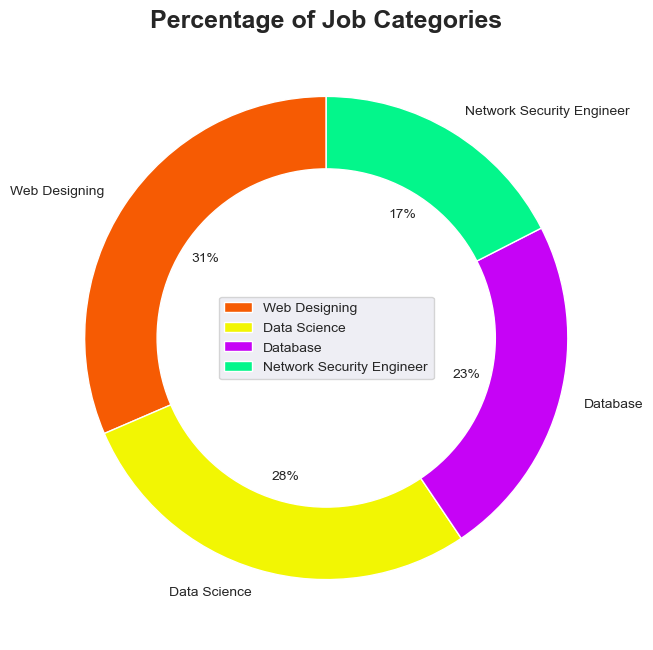

In [25]:
import matplotlib.pyplot as plt
import numpy as np

sizes = [45, 40, 33, 25] 
labels = ['Web Designing', 'Data Science', 'Database', 'Network Security Engineer']
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0, 0, 0, 0)  

fig = plt.figure(figsize=(8, 8), dpi=100)
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.0f%%', explode=explode, startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Job Categories', fontsize=18, fontweight='bold')
plt.legend(labels, loc='center')

plt.show()

fig.savefig('IMG/Per_Job_Cat_Pie.png', dpi=500)


In [26]:
resumes = resume_data['Resume'].str.lower().str.cat(sep=' ')
total_words = word_tokenize(resumes)

# حساب تكرار الكلمات
freq_word = FreqDist(total_words)

#اعلى 10 كلمات تكرارا    
print(freq_word.most_common(10))


[('data', 547), ('description', 513), ('project', 468), ('year', 418), ('company', 411), ('less', 378), ('server', 328), ('application', 316), ('security', 308), ('network', 306)]


In [27]:
# Classification Models
#1 MultinomialNB Classifier


model_NB = MultinomialNB().fit(X_train, y_train)
prediction_mnb = model_NB.predict(X_test)

precision_NB = precision_score(y_test, prediction_mnb, average='weighted')
recall_NB = recall_score(y_test, prediction_mnb, average='weighted')
f1_NB = f1_score(y_test, prediction_mnb, average='weighted')

print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(model_NB.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(model_NB.score(X_test, y_test)))

Accuracy of MultinomialNB Classifier on training set: 0.99
Accuracy of MultinomialNB Classifier on test set: 0.94


In [28]:
print(metrics.classification_report(y_test, prediction_mnb))

metrics.confusion_matrix(y_test,prediction_mnb)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



array([[10,  0,  0,  0],
       [ 2,  6,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  0,  0, 12]], dtype=int64)

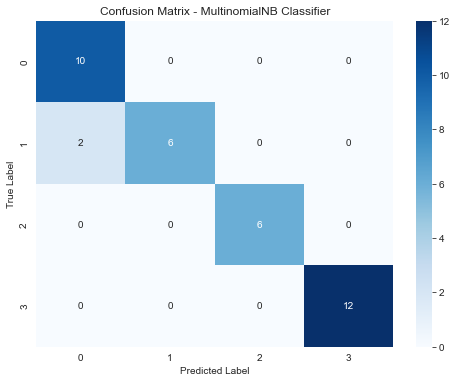

In [29]:
cm = confusion_matrix(y_test, prediction_mnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MultinomialNB Classifier')
plt.show()


In [30]:
# Classification Models
# 2 KNN Classifier

model_knn = KNeighborsClassifier().fit(X_train, y_train)
prediction_knc = model_knn.predict(X_test)

precision_knn = precision_score(y_test, prediction_knc, average='weighted')
recall_knn = recall_score(y_test, prediction_knc, average='weighted')
f1_knn = f1_score(y_test, prediction_knc, average='weighted')

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(model_knn.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(model_knn.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set: 0.94


In [31]:
print(metrics.classification_report(y_test, prediction_knc))

metrics.confusion_matrix(y_test,prediction_knc) 

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.80      1.00      0.89         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.94        36
weighted avg       0.96      0.94      0.94        36



array([[ 8,  2,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  0,  0, 12]], dtype=int64)

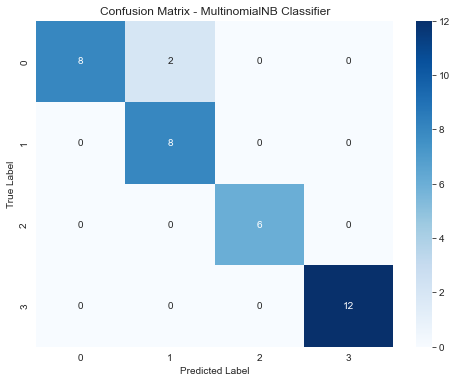

In [32]:
cm = confusion_matrix(y_test, prediction_knc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MultinomialNB Classifier')
plt.show()


In [33]:
# Classification Models
# 3 Decision Tree Classifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
prediction_dt = model_dt.predict(X_test)


print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(model_dt.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(model_dt.score(X_test, y_test)))


Accuracy of Decision Tree Classifier on training set: 1.00
Accuracy of Decision Tree Classifier on test set: 1.00


In [34]:
print(metrics.classification_report(y_test, prediction_dt))

metrics.confusion_matrix(y_test,prediction_dt) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



array([[10,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  0,  0, 12]], dtype=int64)

In [35]:
# Classification Models
# 4 Random Forest Classifier


model_rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
prediction_rf = model_rf.predict(X_test)


print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(model_rf.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(model_rf.score(X_test, y_test)))


Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 1.00


In [36]:
print(metrics.classification_report(y_test, prediction_rf))

metrics.confusion_matrix(y_test,prediction_rf) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



array([[10,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  0,  0, 12]], dtype=int64)

In [37]:
# Classification Models
# 5 SVM Classifier


model_svm = SVC(kernel='linear').fit(X_train, y_train)
prediction_svm = model_svm.predict(X_test)

print('Accuracy of SVM Classifier on training set: {:.2f}'.format(model_svm.score(X_train, y_train)))
print('Accuracy of SVM Classifier on test set: {:.2f}'.format(model_svm.score(X_test, y_test)))


Accuracy of SVM Classifier on training set: 1.00
Accuracy of SVM Classifier on test set: 1.00


In [38]:
print(metrics.classification_report(y_test, prediction_svm))

metrics.confusion_matrix(y_test,prediction_svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



array([[10,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  0,  0, 12]], dtype=int64)

In [39]:
# Classification Models
# 6 Logistic Regression


model_lr = LogisticRegression().fit(X_train, y_train)
prediction_lr = model_lr.predict(X_test)

print('Accuracy of Logistic Regression on training set: {:.2f}'.format(model_lr.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(model_lr.score(X_test, y_test)))


Accuracy of Logistic Regression on training set: 1.00
Accuracy of Logistic Regression on test set: 1.00


In [40]:
print(metrics.classification_report(y_test, prediction_lr))

metrics.confusion_matrix(y_test,prediction_lr) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



array([[10,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  0,  6,  0],
       [ 0,  0,  0, 12]], dtype=int64)

In [41]:
# Classification Models
# 7 AdaBoost Classifier


base_estimator = DecisionTreeClassifier(max_depth=1)
model_Adaboost = AdaBoostClassifier(n_estimators=50)
model_Adaboost.estimator_ = base_estimator
model_Adaboost.fit(X_train, y_train)
prediction_adaboost = model_Adaboost.predict(X_test)


precision_Adaboost = precision_score(y_test, prediction_adaboost, average='weighted')
recall_Adaboost = recall_score(y_test, prediction_adaboost, average='weighted')
f1_Adaboost = f1_score(y_test, prediction_adaboost, average='weighted')


print('Accuracy of AdaBoost Classifier on training set: {:.2f}'.format(model_Adaboost.score(X_train, y_train)))
print('Accuracy of AdaBoost Classifier on test set: {:.2f}'.format(model_Adaboost.score(X_test, y_test)))


Accuracy of AdaBoost Classifier on training set: 0.69
Accuracy of AdaBoost Classifier on test set: 0.67


In [42]:
print(metrics.classification_report(y_test, prediction_adaboost))

metrics.confusion_matrix(y_test,prediction_adaboost) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.40      1.00      0.57         8
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00        12

    accuracy                           0.67        36
   macro avg       0.60      0.75      0.64        36
weighted avg       0.53      0.67      0.57        36



array([[10,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  0,  6,  0],
       [ 0, 12,  0,  0]], dtype=int64)

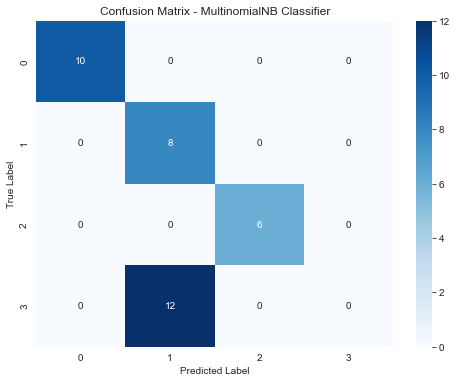

In [43]:
cm = confusion_matrix(y_test, prediction_adaboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MultinomialNB Classifier')
plt.show()


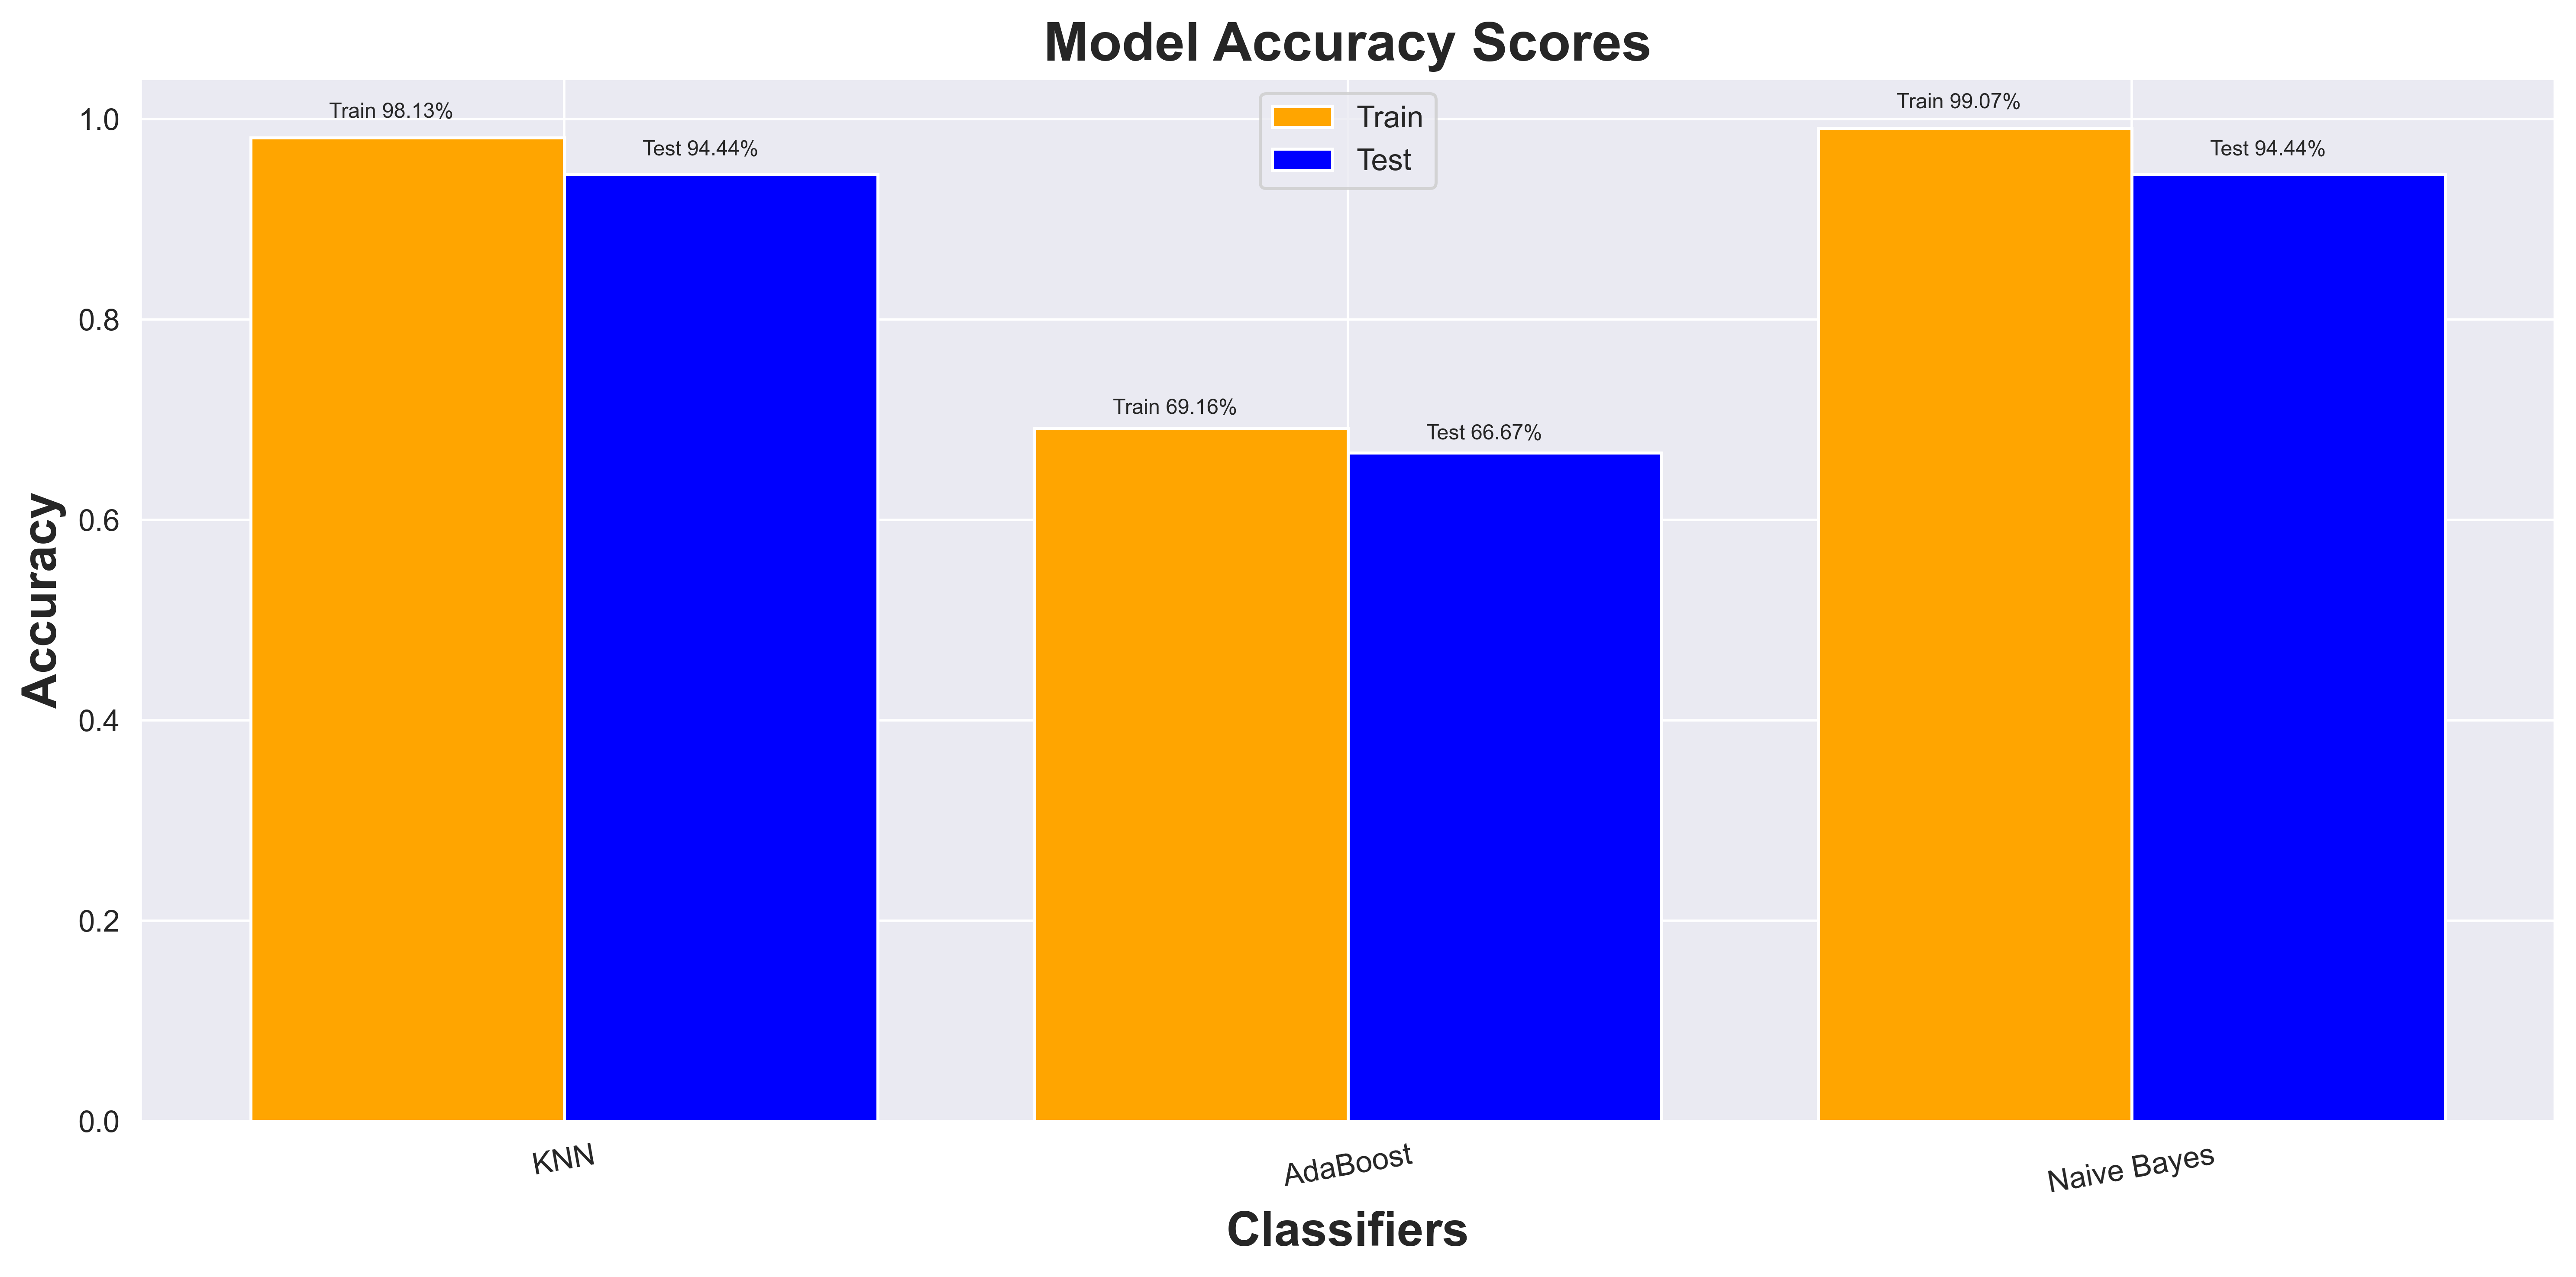

In [44]:
models = [model_knn, model_Adaboost, model_NB]

Train_accuracies = []
Test_accuracies = []

for model in models:
    
    model.fit(X_train, y_train)

    accuracy_train = model.score(X_train, y_train)
    Train_accuracies.append(accuracy_train)

    accuracy_test = model.score(X_test, y_test)
    Test_accuracies.append(accuracy_test)

rcParams = {'xtick.labelsize':'12', 'ytick.labelsize':'14', 'axes.labelsize':'16'}
fig, axe = plt.subplots(1, 1, figsize=(12, 6), dpi=500)

model_names = ["KNN","AdaBoost", "Naive Bayes"]

bar1 = plt.bar(np.arange(len(model_names)) - 0.2, Train_accuracies, width=0.4, label='Train', color="orange")
bar2 = plt.bar(np.arange(len(model_names)) + 0.2, Test_accuracies, width=0.4, label='Test', color="blue")

plt.xticks(np.arange(len(model_names)), model_names, rotation=10)
plt.xlabel("Classifiers", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy", fontsize=16, fontweight='bold')
plt.title("Model Accuracy Scores", fontsize=18, fontweight='bold')
plt.legend()

for i, (bar_train, bar_test) in enumerate(zip(bar1, bar2)):
    plt.text(bar_train.get_x() + bar_train.get_width() / 2 - 0.1, bar_train.get_height() * 1.02,
             s='Train {:.2%}'.format(Train_accuracies[i]), fontsize=7)
    
    plt.text(bar_test.get_x() + bar_test.get_width() / 2 - 0.1, bar_test.get_height() * 1.02,
             s='Test {:.2%}'.format(Test_accuracies[i]), fontsize=7)

plt.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


In [45]:
# قمنا بعمل تنظيف للملف الذي يحتوي على سير ذاتية للاختبار

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text


file_path = r'C:\Users\HP\Desktop\data\test.xlsx'
df = pd.read_excel(file_path)


df['resume'] = df['resume'].apply(preprocess_text)


df.to_excel(file_path, index=False)

print("Text preprocessing completed and saved to the Excel file.")


Text preprocessing completed and saved to the Excel file.


In [46]:
test_data = pd.read_excel(r'C:\Users\HP\Desktop\data\test.xlsx')

test_text = test_data["resume"].values
test_index = test_data["index"].values if "index" in test_data.columns else None


# استخدمنا نفس مصفوفة TF-IDF
# ونموذج MultinomialNB
# الذي تم تدريبه سابقا


# تحويل النصوص إلى متجهات باستخدام المتغير word_vectorizer
test_vectors = word_vectorizer.transform(test_text)

# توقع التصنيفات باستخدام نموذج NB
test_predictions = model_NB.predict(test_vectors)


for i in range(len(test_predictions)):
    if test_index is not None:
        print(f"Resume {test_index[i]} - Predicted Category: {test_predictions[i]}")
    else:
        print(f"Resume {i+1} - Predicted Category: {test_predictions[i]}")


Resume 1 - Predicted Category: 0
Resume 2 - Predicted Category: 0
Resume 3 - Predicted Category: 0
Resume 4 - Predicted Category: 0
Resume 5 - Predicted Category: 0
Resume 6 - Predicted Category: 3
Resume 7 - Predicted Category: 3
Resume 8 - Predicted Category: 3
Resume 9 - Predicted Category: 3
Resume 10 - Predicted Category: 3
Resume 11 - Predicted Category: 3
Resume 12 - Predicted Category: 3
Resume 13 - Predicted Category: 2
Resume 14 - Predicted Category: 2
Resume 15 - Predicted Category: 2
Resume 16 - Predicted Category: 2
Resume 17 - Predicted Category: 2
Resume 18 - Predicted Category: 2
Resume 19 - Predicted Category: 1
Resume 20 - Predicted Category: 1
Resume 21 - Predicted Category: 1
Resume 22 - Predicted Category: 1
Resume 23 - Predicted Category: 0
Resume 24 - Predicted Category: 2
Resume 25 - Predicted Category: 1


In [47]:
test_probs = model_NB.predict_proba(test_vectors)

category_names = Encoder.classes_

top_probs = test_probs.max(axis=1)

top_prob_indices = test_probs.argmax(axis=1)

top_categories = Encoder.inverse_transform(top_prob_indices)

test_results = pd.DataFrame({
    'Index': test_data["index"],
    'Resume': test_data["resume"],
    'Probability': top_probs,
    'Top Category': top_categories
})

for i, category in enumerate(category_names):
    test_results[f'{category} Probability'] = test_probs[:, i]

# حفظ النتائج في ملف Excel
# يجب ان تقوم بتغيير امتداد الملف على جهازك لترى النتائج

output_file_with_probs = r'C:\Users\HP\Desktop\data\first_try\test_results_with_probs.xlsx'
test_results.to_excel(output_file_with_probs, index=False)
print(f"All results with probabilities for each category saved to {output_file_with_probs}")


All results with probabilities for each category saved to C:\Users\HP\Desktop\data\first_try\test_results_with_probs.xlsx


In [48]:
# قاموس يعين ألوانًا لكل وظيفة
job_colors = {
    'Data Science': "FF0000",  # الأحمر
    'Database': "FFFF00",       # الأصفر
    'Web Designing': "008000",     # الأخضر
    'Network Security Engineer': "0000FF" # الأزرق
}

# تحميل الملف والتعامل معه مباشرة
# يجب ان تقوم بتغيير امتداد الملف على جهازك لترى النتائج

file_path =r'C:\Users\HP\Desktop\data\first_try\test_results_with_probs.xlsx'
df = pd.read_excel(file_path)
workbook = load_workbook(file_path)
sheet = workbook.active

# دالة لتحديد الخلية وتلوينها باللون المحدد
def highlight_top_resumes(column_name, fill_color):
    # تحديد أعلى خمس قيم في العمود المعني
    top_values = df.sort_values(by=column_name, ascending=False).head(5)
    # تلوين الخلايا المناسبة باللون المحدد
    for idx, row in top_values.iterrows():
        row_number = idx + 2  # الصفوف تبدأ من 1 ولكن القوائم تبدأ من 0، ويجب إضافة 2 لتوافق الصفوف في Excel
        sheet[f'A{row_number}'].fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")

for job_title, color in job_colors.items():
    highlight_top_resumes(job_title + ' Probability', color) 

workbook.save(file_path)


In [49]:
data = pd.read_excel(r"C:\Users\HP\Desktop\data\Training_Data.xlsx")

text_data = data['Resume'].tolist()
labels = data['Category'].tolist()

label_mapping = {
    'Web Designing': 0,
    'Data Science': 1,
    'Database': 2,
    'Network Security Engineer': 3
}
data_labels = [label_mapping[label] for label in labels]

# إنشاء مصفوفة سمات الكلمات باستخدام CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
features = vectorizer.fit_transform(text_data)
document_term_matrix = features.toarray()

# تدريب نموذج التصنيف
model = MultinomialNB()
model.fit(document_term_matrix, data_labels)

# اختبار بعض النصوص
test_text = [
    "Experienced  with proficiency in HTML, CSS, and JavaScript.",
    "Skilled  with expertise in machine learning and data analysis.",
    " administrator with strong SQL skills.",
    " experienced in implementing firewalls and intrusion detection systems."
]

for idx, text in enumerate(test_text):
    print(f"Test {idx + 1}: {text}")
    test_vector = vectorizer.transform([text]).toarray()
    predicted_label = model.predict(test_vector)[0]
    predicted_category = [k for k, v in label_mapping.items() if v == predicted_label][0]
    print(f"Predicted category: {predicted_category}")


Test 1: Experienced  with proficiency in HTML, CSS, and JavaScript.
Predicted category: Web Designing
Test 2: Skilled  with expertise in machine learning and data analysis.
Predicted category: Data Science
Test 3:  administrator with strong SQL skills.
Predicted category: Database
Test 4:  experienced in implementing firewalls and intrusion detection systems.
Predicted category: Data Science


In [50]:
# محاولة تدريب الملف الذي يحتوي على 143 سيرة ذاتية ، ثم ادخال ملف اختبار ومحاولة التنبأ بكل سيرة ذاتية لاي وظيفة تنتمي
training_data = pd.read_excel(r"C:\Users\HP\Desktop\data\Training_Data.xlsx")

test_data = pd.read_excel(r"C:\Users\HP\Desktop\data\test.xlsx")

training_text = training_data['Resume'].tolist()
training_labels = training_data['Category'].tolist()

label_mapping = {
    'Web Designing': 0,
    'Data Science': 1,
    'Database': 2,
    'Network Security Engineer': 3
}
training_labels = [label_mapping[label] for label in training_labels]

vectorizer = CountVectorizer(lowercase=True, stop_words='english')
training_features = vectorizer.fit_transform(training_text)
training_document_term_matrix = training_features.toarray()

model = MultinomialNB()
model.fit(training_document_term_matrix, training_labels)

test_text = test_data['resume'].tolist()

test_vectorized = vectorizer.transform(test_text).toarray()

predicted_categories = model.predict(test_vectorized)

predicted_labels = [list(label_mapping.keys())[list(label_mapping.values()).index(category)] for category in predicted_categories]

for idx, text in enumerate(test_text):
    print(f"Resume {idx + 1}: {text}")
    print(f"Predicted category: {predicted_labels[idx]}")
    print()


Resume 1: based information provided 10 resumes data science category resume 1 full name contact information objective dedicated data science professional experienced python machine learning data visualization seeking opportunities utilize skills regression random forest decision trees cluster analysis drive actionable insights solutions work experience data science assurance associate young skill python company conducted fraud dispute assurance technology reviews utilized python analytics tableau visualization collaborated core member team review platform tools scratch employed regular expressions angular flask various projects explored computer vision techniques deep data analysis education degree institution graduation date skills python machine learning regression random forest tableau natural language processing dimensionality reduction data visualization flask git docker computer vision
Predicted category: Data Science

Resume 2: objective passionate data scientist focus python m

In [51]:
# تجربة حساب نسبة تطابق سيرة ذاتية واحدة مع كل وظيفة ثم تحديد ان السيرة الذاتية تنتمي لاي وظيفة بناءً على اعلى نسبة تطابق 

def preprocess_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

def find_score(jobdes, filename, customKeywords):   
    resume = preprocess_file(filename)
    custom_keywords = ' '.join(customKeywords)
    jobdes = jobdes + ' ' + custom_keywords
    text = [resume, jobdes]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    matchpercent = cosine_similarity(count_matrix)[0][1] * 100
    matchpercent = round(matchpercent, 2)
    return matchpercent


resume_file = r'C:\Users\HP\Desktop\data\data_science_resume.txt'


# Data Science job
job_description_file = r'C:\Users\HP\Desktop\data\Data_science.txt'
custom_keywords = ["python", "machine learning", "big data", "Deep Learning", "AI", "Artificial Intelligence", "data analysis", "statistical modeling", "visualization", "Regression", "Cluster Analysis", "Sentiment Analysis", "Natural Language processing"]
data_science_score = find_score(job_description_file, resume_file, custom_keywords)

# Database job
job_description_file = r'C:\Users\HP\Desktop\data\Database.txt'
custom_keywords = ["MySQL","SQL", "Oracle","relational database management system " "database design", "normalization","Query","Replication", "optimization", "integrity","DBMS","data access"]
database_score = find_score(job_description_file, resume_file, custom_keywords)

# Web Design job
job_description_file = r'C:\Users\HP\Desktop\data\Web_Design.txt'
custom_keywords = ["Web Design", "design", "UI/UX","HTML","Prototyping", "CSS", "JavaScript", "Node.js", "React.js", "Laravel", "web2py", "ASP.NET" , "Angular JS", "HTML5", "CSS3", "SASS", "Bootstrap", "jQuery", "JavaScript", "Visual Studio", "Photoshop"]
web_design_score = find_score(job_description_file, resume_file, custom_keywords)

# Network Security Engineer job
job_description_file = r'C:\Users\HP\Desktop\data\Network_Security_Engineer.txt'
custom_keywords = ["Computer Engineering", "Cybersecurity", "secure", "networks", "firewall","detection","prevention","protocols", "encryption", "CISSP", "cisco", "router", "server", "lan", "wan","Access Control","Authentication", "host"]
network_security_score = find_score(job_description_file, resume_file, custom_keywords)


print("Data Science Similarity Score:", data_science_score, "%")
print("Database Similarity Score:", database_score, "%")
print("Web Design Similarity Score:", web_design_score, "%")
print("Network Security Engineer Similarity Score:", network_security_score, "%")


def determine_job_category(data_science_score, database_score, web_design_score, network_security_score):
    scores = {
        "Data Science": data_science_score,
        "Database": database_score,
        "Web Design": web_design_score,
        "Network Security Engineer": network_security_score
    }
    max_score = max(scores.values())
    job_category = [k for k, v in scores.items() if v == max_score]
    return job_category[0]


job_category = determine_job_category(data_science_score, database_score, web_design_score, network_security_score)
print("Predicted Job Category:", job_category)


Data Science Similarity Score: 42.97 %
Database Similarity Score: 26.21 %
Web Design Similarity Score: 11.38 %
Network Security Engineer Similarity Score: 14.8 %
Predicted Job Category: Data Science


In [52]:
# ينشأ ملفات جديدة كل ملف لوظيفة معينة تحتوي على رقم السيرة الذاتية بالاضافة لنسبة التطابق بين السيرة الذاتية وهذه الوظيفة المعينة

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

def find_score(jobdes, resume, customKeywords):   
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(customKeywords)
    jobdes = jobdes + ' ' + custom_keywords
    text = [resume, jobdes]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    matchpercent = cosine_similarity(count_matrix)[0][1] * 100
    matchpercent = round(matchpercent, 2)
    return matchpercent

def process_resumes(job_description_file, resume_file, custom_keywords):
    job_description = preprocess_text(open(job_description_file, 'r', encoding='utf-8').read())
    resumes_df = pd.read_excel(resume_file)

    results = []
    for index, row in resumes_df.iterrows():
        resume_text = row['resume']
        score = find_score(job_description, resume_text, custom_keywords)
        results.append({'Index': row['index'], 'Score': score})
    return results


job_categories_files = {
    "Data Science": r'C:\Users\HP\Desktop\data\Data_science.txt',
    "Database": r'C:\Users\HP\Desktop\data\Database.txt',
    "Web Design": r'C:\Users\HP\Desktop\data\Web_Design.txt',
    "Network Security Engineer": r'C:\Users\HP\Desktop\data\Network_Security_Engineer.txt'
}

job_categories = {
    "Data Science": ["python", "machine learning", "big data", "deep learning", "ai", "artificial intelligence", "data analysis", "statistical modeling", "visualization", "regression", "cluster analysis", "sentiment analysis", "natural language processing"],
    "Database": ["mysql", "sql", "oracle", "relational database management system", "database design", "normalization", "query", "replication", "optimization", "integrity", "dbms", "data access"],
    "Web Design": ["web design", "design", "ui/ux", "html", "prototyping", "css", "javascript", "node.js", "react.js", "laravel", "web2py", "asp.net", "angular js", "html5", "css3", "sass", "bootstrap", "jquery", "javascript", "visual studio", "photoshop"],
    "Network Security Engineer": ["computer engineering", "cybersecurity", "secure", "networks", "firewall", "detection", "prevention", "protocols", "encryption", "cissp", "cisco", "router", "server", "lan", "wan", "access control", "authentication", "host"]
}


desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')

# قم بالتاكد من مسار الملفات

for category, keywords in job_categories.items():
    results = process_resumes(job_categories_files[category], r'C:\Users\HP\Desktop\data\test.xlsx', keywords)
    output_file = os.path.join(r'C:\Users\HP\Desktop\data\second_try', f"{category}_results.xlsx")
    pd.DataFrame(results).to_excel(output_file, index=False)
    print(f"Results for {category} saved to {output_file}")


Results for Data Science saved to C:\Users\HP\Desktop\data\second_try\Data Science_results.xlsx
Results for Database saved to C:\Users\HP\Desktop\data\second_try\Database_results.xlsx
Results for Web Design saved to C:\Users\HP\Desktop\data\second_try\Web Design_results.xlsx
Results for Network Security Engineer saved to C:\Users\HP\Desktop\data\second_try\Network Security Engineer_results.xlsx


In [53]:
# يقوم هذا الكود بانشاء ملف يحتوي على سير ذاتية للاختبار مع عرض للوظيفة التي تم التنبا بها ، مع نسبة تطابق السيرة الذاتية مع كل وظيفة


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

def find_score(jobdes, resume, customKeywords):   
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(customKeywords)
    jobdes = jobdes + ' ' + custom_keywords
    text = [resume, jobdes]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    matchpercent = cosine_similarity(count_matrix)[0][1] * 100
    matchpercent = round(matchpercent, 2)
    return matchpercent

def find_best_matching_category(job_description, resume, job_categories, custom_keywords):
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(custom_keywords)
    job_description = job_description + ' ' + custom_keywords

    max_score = 0
    best_category = ""

    for category, keywords in job_categories.items():
        job_keywords = ' '.join(keywords)
        text = [resume, job_keywords]
        cv = CountVectorizer()
        count_matrix = cv.fit_transform(text)
        matchpercent = cosine_similarity(count_matrix)[0][1] * 100
        matchpercent = round(matchpercent, 2)
        
        if matchpercent > max_score:
            max_score = matchpercent
            best_category = category

    return best_category

def process_resumes(job_categories_files, resume_file, job_categories):
    resumes_df = pd.read_excel(resume_file)

    results = []
    for index, row in resumes_df.iterrows():
        resume_text = row['resume']
        job_description_scores = {}
        for category, job_description_file in job_categories_files.items():
            job_description = open(job_description_file, 'r', encoding='utf-8').read()
            score = find_score(job_description, resume_text, job_categories[category])
            job_description_scores[category] = score

        best_category = max(job_description_scores, key=job_description_scores.get)
        data_science_score = job_description_scores.get('Data_Science', 0)
        database_score = job_description_scores.get('Database', 0)
        web_design_score = job_description_scores.get('Web_Design', 0)
        network_security_score = job_description_scores.get('Network_Security_Engineer', 0)

        results.append({
            'Index': row['index'],
            'Resume': resume_text,
            'Result': best_category,
            'Data Science Score': data_science_score,
            'Database Score': database_score,
            'Web Design Score': web_design_score,
            'Network Security Score': network_security_score
        })

    return pd.DataFrame(results)

job_categories_files = {
    "Data_Science": r'C:\Users\HP\Desktop\data\Data_science.txt',
    "Database": r'C:\Users\HP\Desktop\data\Database.txt',
    "Web_Design": r'C:\Users\HP\Desktop\data\Web_Design.txt',
    "Network_Security_Engineer": r'C:\Users\HP\Desktop\data\Network_Security_Engineer.txt'
}

job_categories = {
    "Data_Science": ["python", "machine learning", "big data", "deep learning", "ai", "artificial intelligence", "data analysis", "statistical modeling", "visualization", "regression", "cluster analysis", "sentiment analysis", "natural language processing"],
    "Database": ["mysql", "sql", "oracle", "relational database management system", "database design", "normalization", "query", "replication", "optimization", "integrity", "dbms", "data access"],
    "Web_Design": ["web design", "design", "ui/ux", "html", "prototyping", "css", "javascript", "node.js", "react.js", "laravel", "web2py", "asp.net", "angular js", "html5", "css3", "sass", "bootstrap", "jquery", "javascript", "visual studio", "photoshop"],
    "Network_Security_Engineer": ["computer engineering", "cybersecurity", "secure", "networks", "firewall", "detection", "prevention", "protocols", "encryption", "cissp", "cisco", "router", "server", "lan", "wan", "access control", "authentication", "host"]
}


desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')


results_df = process_resumes(job_categories_files, r'C:\Users\HP\Desktop\data\test.xlsx', job_categories)
output_file = os.path.join(r'C:\Users\HP\Desktop\data\second_try', "all_results_with_job_titles.xlsx")
results_df.to_excel(output_file, index=False)
print(f"All results with job titles saved to {output_file}")


All results with job titles saved to C:\Users\HP\Desktop\data\second_try\all_results_with_job_titles.xlsx


In [54]:
# تلوين افضل خمس سير ذاتية لكل وظيفة

# الملف الذي قمنا بانشاؤه في الكود السابق
df = pd.read_excel(r'C:\Users\HP\Desktop\data\second_try\all_results_with_job_titles.xlsx')

workbook = load_workbook(r'C:\Users\HP\Desktop\data\second_try\all_results_with_job_titles.xlsx')
sheet = workbook.active

# دالة لتحديد الخلية وتلوينها باللون المحدد
def highlight_cells(column_name, fill_color):
    # العثور على أعلى 5 قيم في العمود المعني
    top_values = df[column_name].nlargest(5)
    # تحديد الخلايا التي تحتوي على أعلى القيم وتلوينها باللون المحدد
    for i, value in enumerate(top_values):
        row_number = df[df[column_name] == value].index[0] + 2  # يجب إضافة 2 لأن الصفوف تبدأ من 1 ولكن القوائم تبدأ من 0
        sheet[f'A{row_number}'].fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")

# استدعاء الدالة لكل عمود مع المعلومات المطلوبة
highlight_cells('Data Science Score', "FF0000")  # تلوين باللون الأحمر
highlight_cells('Database Score', "FFFF00")      # تلوين باللون الأصفر
highlight_cells('Web Design Score', "008000")     # تلوين باللون الأخضر
highlight_cells('Network Security Score', "0000FF") # تلوين باللون الأزرق

# حفظ التغييرات
workbook.save(r'C:\Users\HP\Desktop\data\second_try\all_results_with_job_titles.xlsx')


In [55]:
# تجربة على 143 سيرة ذاتية 

In [56]:
# عرض محتويات الملف وبعض المعلومات عنه 

file_path_jobs = r'C:\Users\HP\Desktop\data\third_try\update-test.xlsx'
df = pd.read_excel(file_path_jobs)

index = df['index'].tolist()
resumes = df['Resume'].tolist()

valid_words = set(nltk.corpus.words.words())

processed_texts = []

for resume in resumes:
    resume = str(resume).lower()
    resume = resume.translate(str.maketrans('', '', string.punctuation))
    words = nltk.word_tokenize(resume)
    stop_words = set(stopwords.words('english'))
    
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() in valid_words]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos='v') for word in filtered_words]
    processed_text = ' '.join(lemmatized_words)

    processed_texts.append(processed_text)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_texts)

token2id = {token: idx for idx, token in enumerate(vectorizer.get_feature_names_out())}

print("Processed Texts:")
for idx, processed_text in enumerate(processed_texts):
    print(f"Processed Text {idx + 1}:\n{processed_text}\n")

print("\nToken to ID mapping:", token2id)

total_words_count = len(nltk.word_tokenize(processed_texts_with_newline))
print(f"\nTotal number of words in the file: {total_words_count}")

result_df = pd.DataFrame({'index': index, 'Resume': processed_texts})

# انشاء ملف جديد 
output_file_path = r'C:\Users\HP\Desktop\data\third_try\update-test-111.xlsx'

# Save the DataFrame to the new Excel file
result_df.to_excel(output_file_path, index=False)

print(f"Results saved to {output_file_path}")


Processed Texts:
Processed Text 1:
python machine learn regression random forest decision cluster analysis word sentiment analysis natural language dimensionality reduction topic neural tableau regular expression angular python flask git docker computer vision open understand deep data science assurance associate data science assurance associate young skill python company young description fraud dispute technology tar technology review review process run analytics generate core member team review platform tool scratch e discovery domain tool predictive topic result reduce labor time spend understand end end flow solution research development classification predictive analysis mine information present text data work precision entire tar predictive topic evidence follow ey classifier order identify red python cosine similarity topic text blob sentiment analysis tableau dashboard multiple data science analytic text analytics motor vehicle customer review data receive customer feedback sur

In [57]:
# عمل تنظيف للسير الذاتية داخل الملف


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text


file_path = r'C:\Users\HP\Desktop\data\third_try\update-test.xlsx'
df = pd.read_excel(file_path)


df['Resume'] = df['Resume'].apply(preprocess_text)


df.to_excel(file_path, index=False)

print("Text preprocessing completed and saved to the Excel file.")


Text preprocessing completed and saved to the Excel file.


In [58]:
# ينشأ ملفات جديدة كل ملف لوظيفة معينة تحتوي على رقم السيرة الذاتية بالاضافة لنسبة التطابق بين السيرة الذاتية وهذه الوظيفة المعينة


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

def find_score(jobdes, resume, customKeywords):   
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(customKeywords)
    jobdes = jobdes + ' ' + custom_keywords
    text = [resume, jobdes]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    matchpercent = cosine_similarity(count_matrix)[0][1] * 100
    matchpercent = round(matchpercent, 2)
    return matchpercent

def process_resumes(job_description_file, resume_file, custom_keywords):
    job_description = preprocess_text(open(job_description_file, 'r', encoding='utf-8').read())
    resumes_df = pd.read_excel(resume_file)

    results = []
    for index, row in resumes_df.iterrows():
        resume_text = row['Resume']
        score = find_score(job_description, resume_text, custom_keywords)
        results.append({'Index': row['index'], 'Score': score})
    return results


job_categories_files = {
    "Data Science": r'C:\Users\HP\Desktop\data\Data_science.txt',
    "Database": r'C:\Users\HP\Desktop\data\Database.txt',
    "Web Design": r'C:\Users\HP\Desktop\data\Web_Design.txt',
    "Network Security Engineer": r'C:\Users\HP\Desktop\data\Network_Security_Engineer.txt'
}

job_categories = {
    "Data Science": ["python", "machine learning", "big data", "deep learning", "ai", "artificial intelligence", "data analysis", "statistical modeling", "visualization", "regression", "cluster analysis", "sentiment analysis", "natural language processing"],
    "Database": ["mysql", "sql", "oracle", "relational database management system", "database design", "normalization", "query", "replication", "optimization", "integrity", "dbms", "data access"],
    "Web Design": ["web design", "design", "ui/ux", "html", "prototyping", "css", "javascript", "node.js", "react.js", "laravel", "web2py", "asp.net", "angular js", "html5", "css3", "sass", "bootstrap", "jquery", "javascript", "visual studio", "photoshop"],
    "Network Security Engineer": ["computer engineering", "cybersecurity", "secure", "networks", "firewall", "detection", "prevention", "protocols", "encryption", "cissp", "cisco", "router", "server", "lan", "wan", "access control", "authentication", "host"]
}


desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')


for category, keywords in job_categories.items():
    results = process_resumes(job_categories_files[category],  r'C:\Users\HP\Desktop\data\third_try\update-test-111.xlsx', keywords)
    output_file = os.path.join( r'C:\Users\HP\Desktop\data\third_try', f"{category}_results.xlsx")
    pd.DataFrame(results).to_excel(output_file, index=False)
    print(f"Results for {category} saved to {output_file}")


Results for Data Science saved to C:\Users\HP\Desktop\data\third_try\Data Science_results.xlsx
Results for Database saved to C:\Users\HP\Desktop\data\third_try\Database_results.xlsx
Results for Web Design saved to C:\Users\HP\Desktop\data\third_try\Web Design_results.xlsx
Results for Network Security Engineer saved to C:\Users\HP\Desktop\data\third_try\Network Security Engineer_results.xlsx


In [59]:
# يقوم هذا الكود بانشاء ملف يحتوي على سير ذاتية للاختبار مع عرض للوظيفة التي تم التنبا بها ، مع نسبة تطابق السيرة الذاتية مع كل وظيفة


def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    # Convert tokens back to text
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

def find_score(jobdes, resume, customKeywords):   
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(customKeywords)
    jobdes = jobdes + ' ' + custom_keywords
    text = [resume, jobdes]
    cv = CountVectorizer()
    count_matrix = cv.fit_transform(text)
    matchpercent = cosine_similarity(count_matrix)[0][1] * 100
    matchpercent = round(matchpercent, 2)
    return matchpercent

def find_best_matching_category(job_description, resume, job_categories, custom_keywords):
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(custom_keywords)
    job_description = job_description + ' ' + custom_keywords

    max_score = 0
    best_category = ""

    for category, keywords in job_categories.items():
        job_keywords = ' '.join(keywords)
        text = [resume, job_keywords]
        cv = CountVectorizer()
        count_matrix = cv.fit_transform(text)
        matchpercent = cosine_similarity(count_matrix)[0][1] * 100
        matchpercent = round(matchpercent, 2)
        
        if matchpercent > max_score:
            max_score = matchpercent
            best_category = category

    return best_category

def process_resumes(job_categories_files, resume_file, job_categories):
    resumes_df = pd.read_excel(resume_file)

    results = []
    for index, row in resumes_df.iterrows():
        resume_text = row['Resume']
        job_description_scores = {}
        for category, job_description_file in job_categories_files.items():
            job_description = open(job_description_file, 'r', encoding='utf-8').read()
            score = find_score(job_description, resume_text, job_categories[category])
            job_description_scores[category] = score

        best_category = max(job_description_scores, key=job_description_scores.get)
        data_science_score = job_description_scores.get('Data_Science', 0)
        database_score = job_description_scores.get('Database', 0)
        web_design_score = job_description_scores.get('Web_Design', 0)
        network_security_score = job_description_scores.get('Network_Security_Engineer', 0)

        results.append({
            'Index': row['index'],
            'Resume': resume_text,
            'Result': best_category,
            'Data Science Score': data_science_score,
            'Database Score': database_score,
            'Web Design Score': web_design_score,
            'Network Security Score': network_security_score
        })

    return pd.DataFrame(results)

job_categories_files = {
    "Data_Science": r'C:\Users\HP\Desktop\data\Data_Science.txt',
    "Database": r'C:\Users\HP\Desktop\data\Database.txt',
    "Web_Design": r'C:\Users\HP\Desktop\data\Web_Design.txt',
    "Network_Security_Engineer": r'C:\Users\HP\Desktop\data\Network_Security_Engineer.txt'
}

job_categories = {
    "Data_Science": ["python", "machine learning", "big data", "deep learning", "ai", "artificial intelligence", "data analysis", "statistical modeling", "visualization", "regression", "cluster analysis", "sentiment analysis", "natural language processing"],
    "Database": ["mysql", "sql", "oracle", "relational database management system", "database design", "normalization", "query", "replication", "optimization", "integrity", "dbms", "data access"],
    "Web_Design": ["web design", "design", "ui/ux", "html", "prototyping", "css", "javascript", "node.js", "react.js", "laravel", "web2py", "asp.net", "angular js", "html5", "css3", "sass", "bootstrap", "jquery", "javascript", "visual studio", "photoshop"],
    "Network_Security_Engineer": ["computer engineering", "cybersecurity", "secure", "networks", "firewall", "detection", "prevention", "protocols", "encryption", "cissp", "cisco", "router", "server", "lan", "wan", "access control", "authentication", "host"]
}


desktop_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop')


results_df = process_resumes(job_categories_files, r'C:\Users\HP\Desktop\data\third_try\update-test-111.xlsx', job_categories)
output_file = os.path.join(r'C:\Users\HP\Desktop\data\third_try', "all_results_with_job_titles111.xlsx")
results_df.to_excel(output_file, index=False)
print(f"All results with job titles saved to {output_file}")


All results with job titles saved to C:\Users\HP\Desktop\data\third_try\all_results_with_job_titles111.xlsx


In [60]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# قاموس يعين ألوانًا لكل وظيفة
job_colors = {
    'Data Science': "FF0000",  # الأحمر
    'Database': "FFFF00",       # الأصفر
    'Web Design': "008000",     # الأخضر
    'Network Security': "0000FF" # الأزرق
}

# تحميل الملف والتعامل معه مباشرة
file_path = r'C:\Users\HP\Desktop\data\third_try\all_results_with_job_titles111.xlsx'
df = pd.read_excel(file_path)
workbook = load_workbook(file_path)
sheet = workbook.active

# دالة لتحديد الخلية وتلوينها باللون المحدد
def highlight_top_resumes(column_name, fill_color):
    # تحديد أعلى خمس قيم في العمود المعني
    top_values = df.sort_values(by=column_name, ascending=False).head(5)
    # تلوين الخلايا المناسبة باللون المحدد
    for idx, row in top_values.iterrows():
        row_number = idx + 2  # الصفوف تبدأ من 1 ولكن القوائم تبدأ من 0، ويجب إضافة 2 لتوافق الصفوف في Excel
        sheet[f'A{row_number}'].fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")

for job_title, color in job_colors.items():
    highlight_top_resumes(job_title + ' Score', color)

workbook.save(file_path)


In [61]:
# المقارنة بين استخدام 
# TfidfVectorizer و
# CountVectorizer
# لايجاد المطابقة الافضل للسير الذاتية

In [62]:
# using TfidfVectorizer


job_categories_files = {
    "Data Science": r'C:\Users\HP\Desktop\data\Data_science.txt',
    "Database": r'C:\Users\HP\Desktop\data\Database.txt',
    "Web Designing": r'C:\Users\HP\Desktop\data\Web_Design.txt',
    "Network Security Engineer": r'C:\Users\HP\Desktop\data\Network_Security_Engineer.txt'
}

job_categories = {
    "Data Science": ["python", "machine learning", "big data", "deep learning", "ai", "artificial intelligence", "data analysis", "statistical modeling", "visualization", "regression", "cluster analysis", "sentiment analysis", "natural language processing"],
    "Database": ["mysql", "sql", "oracle", "relational database management system", "database design", "normalization", "query", "replication", "optimization", "integrity", "dbms", "data access"],
    "Web Designing": ["web design", "design", "ui/ux", "html", "prototyping", "css", "javascript", "node.js", "react.js", "laravel", "web2py", "asp.net", "angular js", "html5", "css3", "sass", "bootstrap", "jquery", "javascript", "visual studio", "photoshop"],
    "Network Security Engineer": ["computer engineering", "cybersecurity", "secure", "networks", "firewall", "detection", "prevention", "protocols", "encryption", "cissp", "cisco", "router", "server", "lan", "wan", "access control", "authentication", "host"]
}

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

resume_data = pd.read_excel(r"C:\Users\HP\Desktop\data\Training_Data.xlsx")

Encoder = LabelEncoder()
resume_data["LebelEncoding"] = Encoder.fit_transform(resume_data["Category"])

text = resume_data["Resume"].values
labels = resume_data["LebelEncoding"].values
text_train, text_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.25, stratify=resume_data.Category)

# TF-IDF Vectorization
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    use_idf=True,
    stop_words='english',
    max_features=1000
)

X_train = word_vectorizer.fit_transform(text_train)
X_test = word_vectorizer.transform(text_test)

# Train Naive Bayes model
model_NB = MultinomialNB().fit(X_train, y_train)

def find_score(jobdes, resume, customKeywords):   
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(customKeywords)
    jobdes = jobdes + ' ' + custom_keywords
    text = [resume, jobdes]
    # استخدام TfidfVectorizer 
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text)
    # استخدام cosine_similarity مباشرة على المصفوفة المتجهية TF-IDF
    matchpercent = cosine_similarity(tfidf_matrix)[0][1] * 100
    matchpercent = round(matchpercent, 2)
    return matchpercent



def find_best_matching_category(job_description, resume, job_categories, custom_keywords):
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(custom_keywords)
    job_description = job_description + ' ' + custom_keywords

    max_score = 0
    best_category = ""

    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    for category, keywords in job_categories.items():
        job_keywords = ' '.join(keywords)
        text = [resume, job_keywords]
        
        tfidf_matrix = tfidf_vectorizer.fit_transform(text)
        
        cosine_sim = cosine_similarity(tfidf_matrix)[0][1]
        matchpercent = cosine_sim * 100
        matchpercent = round(matchpercent, 2)
        
        if matchpercent > max_score:
            max_score = matchpercent
            best_category = category

    return best_category


def predict_job_category(resume_text):
    resume_vectorized = word_vectorizer.transform([resume_text])
    predicted_category_index = model_NB.predict(resume_vectorized)[0]
    predicted_category = Encoder.inverse_transform([predicted_category_index])[0]
    return predicted_category

def process_resumes(resume_file):
    test_data = pd.read_excel(resume_file)

    results = []
    for index, row in test_data.iterrows():
        resume_text = row['resume']
        predicted_category = predict_job_category(resume_text)
        job_description_scores = {}
        for category, job_description_file in job_categories_files.items():
            job_description = open(job_description_file, 'r', encoding='utf-8').read()
            score = find_score(job_description, resume_text, job_categories[category])
            job_description_scores[category] = score

        best_category = max(job_description_scores, key=job_description_scores.get)
        data_science_score = job_description_scores.get('Data Science', 0)
        database_score = job_description_scores.get('Database', 0)
        web_designing_score = job_description_scores.get('Web Designing', 0)
        network_security_score = job_description_scores.get('Network Security Engineer', 0)

                
        if predicted_category != best_category:
            result_description = f"Predicted category: {predicted_category}, Best category: {best_category}"
        else:
            result_description = f"Predicted and best categories are the same: {predicted_category}"

        results.append({
            'Index': row['index'],
            'Resume': resume_text,
            'Predicted Category': predicted_category,
            'Best Category': best_category,
            'Result Description': result_description,
            'Data Science Score': data_science_score,
            'Database Score': database_score,
            'Web Designing Score': web_designing_score,
            'Network Security Score': network_security_score
        })

    return pd.DataFrame(results)

results_df = process_resumes(r'C:\Users\HP\Desktop\data\test.xlsx')

output_file = r'C:\Users\HP\Desktop\data\results_with_job_titles_and_predictions_TFIDF.xlsx'
results_df.to_excel(output_file, index=False)
print(f"All results with job titles, predictions, and comparisons saved to {output_file}")


All results with job titles, predictions, and comparisons saved to C:\Users\HP\Desktop\data\results_with_job_titles_and_predictions_TFIDF.xlsx


In [63]:
# قاموس يعين ألوانًا لكل وظيفة
job_colors = {
    'Data Science': "FF0000",  # الأحمر
    'Database': "FFFF00",       # الأصفر
    'Web Designing': "008000",     # الأخضر
    'Network Security': "0000FF" # الأزرق
}

file_path =  r'C:\Users\HP\Desktop\data\results_with_job_titles_and_predictions_TFIDF.xlsx'
df = pd.read_excel(file_path)
workbook = load_workbook(file_path)
sheet = workbook.active

def highlight_top_resumes(column_name, fill_color):
    top_resumes = df.nlargest(5, column_name)
    for idx, row in top_resumes.iterrows():
        row_number = idx + 2  
        cell = sheet.cell(row=row_number, column=df.columns.get_loc(column_name) + 1)
        cell.fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")

for job_title, color in job_colors.items():
    highlight_top_resumes(job_title + ' Score', color)

workbook.save(file_path)




In [64]:
# using CountVectorizer


job_categories_files = {
    "Data Science": r'C:\Users\HP\Desktop\data\Data_science.txt',
    "Database": r'C:\Users\HP\Desktop\data\Database.txt',
    "Web Designing": r'C:\Users\HP\Desktop\data\Web_Design.txt',
    "Network Security Engineer": r'C:\Users\HP\Desktop\data\Network_Security_Engineer.txt'
}

job_categories = {
    "Data Science": ["python", "machine learning", "big data", "deep learning", "ai", "artificial intelligence", "data analysis", "statistical modeling", "visualization", "regression", "cluster analysis", "sentiment analysis", "natural language processing"],
    "Database": ["mysql", "sql", "oracle", "relational database management system", "database design", "normalization", "query", "replication", "optimization", "integrity", "dbms", "data access"],
    "Web Designing": ["web design", "design", "ui/ux", "html", "prototyping", "css", "javascript", "node.js", "react.js", "laravel", "web2py", "asp.net", "angular js", "html5", "css3", "sass", "bootstrap", "jquery", "javascript", "visual studio", "photoshop"],
    "Network Security Engineer": ["computer engineering", "cybersecurity", "secure", "networks", "firewall", "detection", "prevention", "protocols", "encryption", "cissp", "cisco", "router", "server", "lan", "wan", "access control", "authentication", "host"]
}

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text


resume_data = pd.read_excel(r"C:\Users\HP\Desktop\data\Training_Data.xlsx")


Encoder = LabelEncoder()
resume_data["LebelEncoding"] = Encoder.fit_transform(resume_data["Category"])


text = resume_data["Resume"].values
labels = resume_data["LebelEncoding"].values
text_train, text_test, y_train, y_test = train_test_split(text, labels, random_state=0, test_size=0.25, stratify=resume_data.Category)

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    use_idf=True,
    stop_words='english',
    max_features=1000
)

X_train = word_vectorizer.fit_transform(text_train)
X_test = word_vectorizer.transform(text_test)

model_NB = MultinomialNB().fit(X_train, y_train)


def find_score(jobdes, resume, customKeywords):   
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(customKeywords)
    jobdes = jobdes + ' ' + custom_keywords
    text = [resume, jobdes]
    # استخدام CountVectorizer 
    count_vectorizer = CountVectorizer()
    count_matrix = count_vectorizer.fit_transform(text)
    # استخدام cosine_similarity مباشرة على المصفوفة المتجهية للتعداد
    matchpercent = cosine_similarity(count_matrix)[0][1] * 100
    matchpercent = round(matchpercent, 2)
    return matchpercent



def find_best_matching_category(job_description, resume, job_categories, custom_keywords):
    resume = preprocess_text(resume)
    custom_keywords = ' '.join(custom_keywords)
    job_description = job_description + ' ' + custom_keywords

    max_score = 0
    best_category = ""

   # Initialize CountVectorizer
    count_vectorizer = CountVectorizer(stop_words='english')

    for category, keywords in job_categories.items():
        job_keywords = ' '.join(keywords)
        text = [resume, job_keywords]
        
        count_matrix = count_vectorizer.fit_transform(text)
        
        cosine_sim = cosine_similarity(count_matrix)[0][1]
        matchpercent = cosine_sim * 100
        matchpercent = round(matchpercent, 2)
        
        if matchpercent > max_score:
            max_score = matchpercent
            best_category = category

    return best_category


def predict_job_category(resume_text):
    resume_vectorized = word_vectorizer.transform([resume_text])
    predicted_category_index = model_NB.predict(resume_vectorized)[0]
    predicted_category = Encoder.inverse_transform([predicted_category_index])[0]
    return predicted_category

def process_resumes(resume_file):
    test_data = pd.read_excel(resume_file)

    results = []
    for index, row in test_data.iterrows():
        resume_text = row['resume']
        predicted_category = predict_job_category(resume_text)
        job_description_scores = {}
        for category, job_description_file in job_categories_files.items():
            job_description = open(job_description_file, 'r', encoding='utf-8').read()
            score = find_score(job_description, resume_text, job_categories[category])
            job_description_scores[category] = score

        best_category = max(job_description_scores, key=job_description_scores.get)
        data_science_score = job_description_scores.get('Data Science', 0)
        database_score = job_description_scores.get('Database', 0)
        web_designing_score = job_description_scores.get('Web Designing', 0)
        network_security_score = job_description_scores.get('Network Security Engineer', 0)

        if predicted_category != best_category:
            result_description = f"Predicted category: {predicted_category}, Best category: {best_category}"
        else:
            result_description = f"Predicted and best categories are the same: {predicted_category}"

        results.append({
            'Index': row['index'],
            'Resume': resume_text,
            'Predicted Category': predicted_category,
            'Best Category': best_category,
            'Result Description': result_description,
            'Data Science Score': data_science_score,
            'Database Score': database_score,
            'Web Designing Score': web_designing_score,
            'Network Security Score': network_security_score
        })

    return pd.DataFrame(results)

results_df = process_resumes(r'C:\Users\HP\Desktop\data\test.xlsx')

output_file = r'C:\Users\HP\Desktop\data\results_with_job_titles_and_predictions_Count.xlsx'
results_df.to_excel(output_file, index=False)
print(f"All results with job titles, predictions, and comparisons saved to {output_file}")


All results with job titles, predictions, and comparisons saved to C:\Users\HP\Desktop\data\results_with_job_titles_and_predictions_Count.xlsx


In [65]:
# قاموس يعين ألوانًا لكل وظيفة
job_colors = {
    'Data Science': "FF0000",  # الأحمر
    'Database': "FFFF00",       # الأصفر
    'Web Designing': "008000",     # الأخضر
    'Network Security': "0000FF" # الأزرق
}

file_path =  r'C:\Users\HP\Desktop\data\results_with_job_titles_and_predictions_Count.xlsx'
df = pd.read_excel(file_path)
workbook = load_workbook(file_path)
sheet = workbook.active

def highlight_top_resumes(column_name, fill_color):
    top_resumes = df.nlargest(5, column_name)
    for idx, row in top_resumes.iterrows():
        row_number = idx + 2 
        cell = sheet.cell(row=row_number, column=df.columns.get_loc(column_name) + 1)
        cell.fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")

        
for job_title, color in job_colors.items():
    highlight_top_resumes(job_title + ' Score', color)

workbook.save(file_path)

In [66]:
# عمل تحميل ل الثلاث اشياء التي قمنا بتدريب السير ذاتية عليهم لاستخدامهم قي ال API
# naive_bayes_model
# Encoder
# word_vectorizer


In [67]:
import pickle

# Save the model to a file
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(model_NB, file)


In [68]:
# Load the model from the file
with open('naive_bayes_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [69]:
import sklearn
import pickle

# Get the scikit-learn version
scikit_ver = sklearn.__version__

# Save the model to a file
filename = "model_{}.pkl".format(scikit_ver)
with open(filename, 'wb') as file:
    pickle.dump(loaded_model, file)


In [70]:
# Load the model from disk
loaded_model = pickle.load(open('naive_bayes_model.pkl', 'rb'))

# Make predictions on the test data
result = loaded_model.score(X_test, y_test)

# Print the accuracy score
print("Accuracy:", result)


Accuracy: 0.9444444444444444


In [71]:
import pickle

# Save the model to a file
with open('Encoder.pkl', 'wb') as file:
    pickle.dump(Encoder, file)


In [72]:
# Load the model from the file
with open('Encoder.pkl', 'rb') as file:
    Encoder = pickle.load(file)


In [73]:
import sklearn
import pickle

# Get the scikit-learn version
scikit_ver = sklearn.__version__

# Save the model to a file
filename = "Encoder_{}.pkl".format(scikit_ver)
with open(filename, 'wb') as file:
    pickle.dump(Encoder, file)


In [74]:
import pickle

# Save the model to a file
with open('word_vectorizer.pkl', 'wb') as file:
    pickle.dump(word_vectorizer, file)


In [75]:
# Load the model from the file
with open('word_vectorizer.pkl', 'rb') as file:
    word_vectorizer = pickle.load(file)


In [76]:
import sklearn
import pickle

# Get the scikit-learn version
scikit_ver = sklearn.__version__

# Save the model to a file
filename = "word_vectorizer_{}.pkl".format(scikit_ver)
with open(filename, 'wb') as file:
    pickle.dump(word_vectorizer, file)
